# U.K. Traffic Accidents — Data Analysis

In [ ]:
#Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time from datetime 
import datetime from scipy.stats 
import linregress

In [17]:
accident_uk_df=pd.read_csv("resources/cleaned_car_accidents.csv")

In [18]:
accident_uk_df.head()

,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,0,200520D002602,-1.832342,52.534986,2,1,3,01/01/2005,7,20:23,...,1,1,1,1,-1,-1,3,0,9,1
1,3,200520D002703,-1.846293,52.465961,3,2,2,02/01/2005,1,18:45,...,2,1,1,1,31,6,3,0,9,1
2,7,200520D004203,-1.794089,52.455003,3,1,1,03/01/2005,2,17:04,...,1,1,1,1,24,5,3,0,9,1
3,8,200520D004603,-1.869954,52.478755,1,1,2,05/01/2005,4,15:05,...,1,1,3,1,31,6,1,0,0,1
4,10,200520D006503,-1.857470,52.469211,3,2,1,05/01/2005,4,22:00,...,2,1,1,2,22,5,3,0,9,1


In [19]:
accident_uk_df.columns


Index(['Unnamed: 0', 'Accident_Index', 'Longitude', 'Latitude',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Reference_x', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Age_o

In [20]:
#calculating the total number of accidents
accident_counts = accident_uk_df.groupby('Accident_Index').size()
accident_counts.count()

68311

In [21]:
accident_uk_df['Date']

0        01/01/2005
1        02/01/2005
2        03/01/2005
3        05/01/2005
4        05/01/2005
            ...    
68306    21/12/2014
68307    23/12/2014
68308    28/12/2014
68309    04/09/2014
68310    07/05/2014
Name: Date, Length: 68311, dtype: object

In [22]:
#adjusting the date format to datetime
accident_uk_df['Date'] = pd.to_datetime(accident_uk_df['Date'], format='%d/%m/%Y')
accident_uk_df

,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,0,200520D002602,-1.832342,52.534986,2,1,3,2005-01-01,7,20:23,...,1,1,1,1,-1,-1,3,0,9,1
1,3,200520D002703,-1.846293,52.465961,3,2,2,2005-01-02,1,18:45,...,2,1,1,1,31,6,3,0,9,1
2,7,200520D004203,-1.794089,52.455003,3,1,1,2005-01-03,2,17:04,...,1,1,1,1,24,5,3,0,9,1
3,8,200520D004603,-1.869954,52.478755,1,1,2,2005-01-05,4,15:05,...,1,1,3,1,31,6,1,0,0,1
4,10,200520D006503,-1.857470,52.469211,3,2,1,2005-01-05,4,22:00,...,2,1,1,2,22,5,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,181826,201420Z500064,-1.937139,52.552170,3,1,1,2014-12-21,1,18:05,...,1,1,3,1,44,7,3,0,0,1
68307,181827,201420Z500084,-1.852342,52.505975,3,2,3,2014-12-23,3,18:30,...,1,1,1,1,28,6,3,0,9,1
68308,181833,201420Z500104,-1.860138,52.509850,3,2,1,2014-12-28,1,16:45,...,2,1,1,2,54,8,3,0,9,1
68309,181835,201420Z500244,-1.871192,52.509054,3,2,2,2014-09-04,5,09:20,...,1,1,1,1,40,7,3,0,19,-1


In [23]:
#changing the format of the date and assigning start_date and end_date variables to keep the dates to filter the data 
#for 5 years duration 
start_date = datetime(2010,1,1)
end_date = datetime(2014,12,31)
year_df=accident_uk_df[(accident_uk_df['Date']>=start_date) & (accident_uk_df['Date']<=end_date)]
year_df

,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
41202,109010,201020D002713,-1.761121,52.482901,3,2,2,2010-01-03,1,14:30,...,2,1,1,2,18,4,3,0,9,1
41203,109014,201020D004613,-1.854218,52.473343,3,2,1,2010-01-02,7,22:05,...,2,1,2,1,27,6,3,0,10,1
41204,109016,201020D006113,-1.843905,52.475397,3,1,1,2010-01-04,2,23:11,...,1,1,3,1,31,6,3,0,0,1
41205,109017,201020D006513,-1.828907,52.470252,3,2,1,2010-01-04,2,13:30,...,2,1,1,1,63,9,3,0,9,1
41206,109019,201020D006913,-1.815186,52.477604,3,2,2,2010-01-05,3,16:30,...,2,1,1,1,39,7,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,181826,201420Z500064,-1.937139,52.552170,3,1,1,2014-12-21,1,18:05,...,1,1,3,1,44,7,3,0,0,1
68307,181827,201420Z500084,-1.852342,52.505975,3,2,3,2014-12-23,3,18:30,...,1,1,1,1,28,6,3,0,9,1
68308,181833,201420Z500104,-1.860138,52.509850,3,2,1,2014-12-28,1,16:45,...,2,1,1,2,54,8,3,0,9,1
68309,181835,201420Z500244,-1.871192,52.509054,3,2,2,2014-09-04,5,09:20,...,1,1,1,1,40,7,3,0,19,-1


In [24]:
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Apply the mapping using replace()
year_df['Accident_Severity'] = year_df['Accident_Severity'].replace(severity_mapping)
year_df

C:\Users\user\AppData\Local\Temp\ipykernel_21972\1463771917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Accident_Severity'] = year_df['Accident_Severity'].replace(severity_mapping)


,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
41202,109010,201020D002713,-1.761121,52.482901,Slight,2,2,2010-01-03,1,14:30,...,2,1,1,2,18,4,3,0,9,1
41203,109014,201020D004613,-1.854218,52.473343,Slight,2,1,2010-01-02,7,22:05,...,2,1,2,1,27,6,3,0,10,1
41204,109016,201020D006113,-1.843905,52.475397,Slight,1,1,2010-01-04,2,23:11,...,1,1,3,1,31,6,3,0,0,1
41205,109017,201020D006513,-1.828907,52.470252,Slight,2,1,2010-01-04,2,13:30,...,2,1,1,1,63,9,3,0,9,1
41206,109019,201020D006913,-1.815186,52.477604,Slight,2,2,2010-01-05,3,16:30,...,2,1,1,1,39,7,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,181826,201420Z500064,-1.937139,52.552170,Slight,1,1,2014-12-21,1,18:05,...,1,1,3,1,44,7,3,0,0,1
68307,181827,201420Z500084,-1.852342,52.505975,Slight,2,3,2014-12-23,3,18:30,...,1,1,1,1,28,6,3,0,9,1
68308,181833,201420Z500104,-1.860138,52.509850,Slight,2,1,2014-12-28,1,16:45,...,2,1,1,2,54,8,3,0,9,1
68309,181835,201420Z500244,-1.871192,52.509054,Slight,2,2,2014-09-04,5,09:20,...,1,1,1,1,40,7,3,0,19,-1


In [25]:
#total number of accidents between 2010 to 2014(in 5 years)
year_counts = year_df.groupby('Accident_Index').size()
year_counts.count()

27109

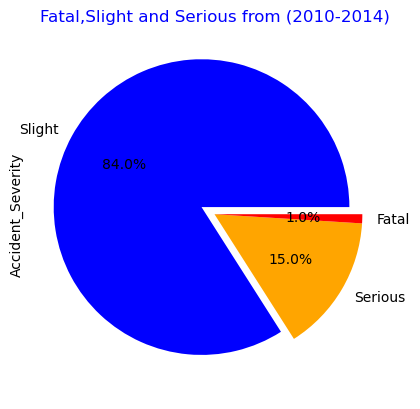

In [46]:
# Generate a pie plot showing the distribution of Fatal,slight,Serious accidents using Pandas
accident_data =year_df["Accident_Severity"].value_counts()
# Define custom colors
colors = ['blue', 'orange', 'red']

# Define explode values (0 for no explosion, >0 for separation)
explode = (0.1, 0, 0)

plt.title("Fatal,Slight and Serious from (2010-2014)",color='blue')
accident_data.plot.pie(autopct= "%1.1f%%",colors=colors, explode=explode)
plt.savefig("maliha_image/piechart.png")
plt.show()


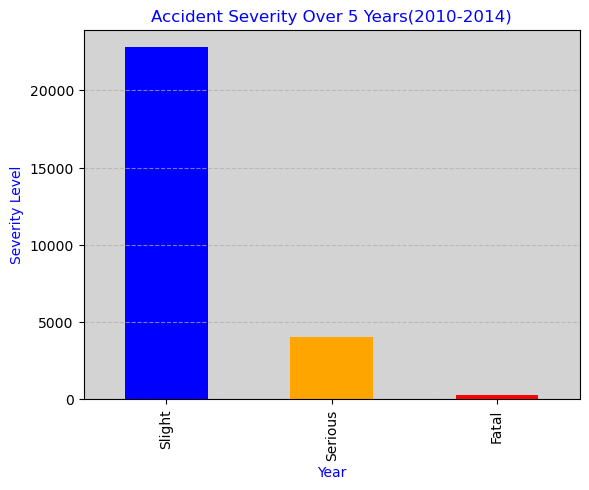

In [47]:
#Bar Chart showing the number of fatal, serious and slight accidents in last 5 years
years = year_df['Date']
severity_counts = year_df['Accident_Severity'].value_counts()

# Group data by year and count the occurrences of each severity level
x_axis =  {'Fatal': ['Fatal'], 
           'Serious':['Serious'], 
           'Slight': ['Slight']}
colors = ['blue', 'orange', 'red'] 
# Create a bar chart
severity_counts.plot(kind='bar', stacked=True,color=colors)

# Set labels and title
plt.xlabel('Year',color='blue')
plt.ylabel('Severity Level',color='blue')
plt.title('Accident Severity Over 5 Years(2010-2014)',color='blue')
# Add a grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# Set background color
plt.gca().set_facecolor('lightgrey')
plt.savefig("maliha_image/bar_years.png")

# Display the chart
plt.show()



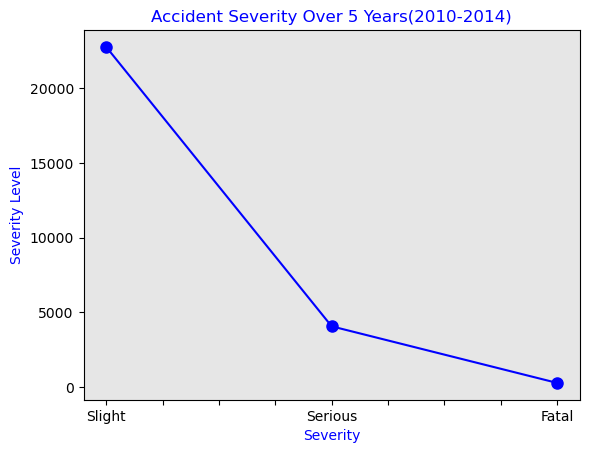

In [48]:
# Line chart showing the accidents by their severity 

x_axis = {'Fatal': ['Fatal'], 
           'Serious':['Serious'], 
           'Slight': ['Slight']}

severity_counts.plot(kind='line', stacked=True,color='blue', marker='o', markersize=8)
# Set labels and title
plt.xlabel('Severity', color='blue')
plt.ylabel('Severity Level', color='blue')
#plt.title('Accident Severity Over 5 Years')
plt.title('Accident Severity Over 5 Years(2010-2014)', color='blue')
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the color code to your desired background color
plt.savefig("maliha_image/line_years.png")
# Display the chart
plt.show()


In [30]:
#making a dataframe including 'Accident_Index', 'Road_Type', 'Accident_Severity',  'Age_Band_of_Driver' to further analysing the data
line_df=year_df[['Accident_Index', 'Road_Type', 'Accident_Severity',  'Age_Band_of_Driver']]
line_df.head()

,Accident_Index,Road_Type,Accident_Severity,Age_Band_of_Driver
41202,201020D002713,6,Slight,9
41203,201020D004613,2,Slight,7
41204,201020D006113,6,Slight,7
41205,201020D006513,6,Slight,-1
41206,201020D006913,6,Slight,-1


In [31]:
#Filtering the column Road_type (roundabouts,dual_carriageway,single_carriageway,single_carriageway=6,slip_road=7) and also for the column "Age Bands of Driver"(21-25)and (46-55)
dual_carriageway = 3
roundabout = 1
oneway_street=2
single_carriageway=6
slip_road=7
age_band_21_25 = 5
age_band_46_55 = 8
newdf = line_df[line_df['Road_Type'].isin([dual_carriageway, roundabout,oneway_street,single_carriageway,slip_road])] 
newdf = line_df[line_df['Age_Band_of_Driver'].isin([age_band_21_25, age_band_46_55])]
newdf

,Accident_Index,Road_Type,Accident_Severity,Age_Band_of_Driver
41219,201020D015712,6,Slight,8
41221,201020D016213,6,Slight,8
41222,201020D017313,6,Serious,5
41224,201020D018013,6,Slight,8
41235,201020D021811,6,Slight,8
...,...,...,...,...
68295,201420Z004524,3,Slight,5
68296,201420Z004584,3,Slight,8
68297,201420Z004594,3,Slight,8
68300,201420Z004724,3,Slight,8


In [32]:
# Mapping the Road_Type categories against their key values 
dual_carriageway = 3
roundabout = 1
oneway_street=2
single_carriageway=6
slip_road=7
type_mapping = {1: 'roundabout',2:'oneway_street',  3: 'dual_carriageway',6:'single_carriageway',7:'slip_road'}
superdf = line_df[line_df['Road_Type'].isin([dual_carriageway, roundabout,oneway_street,single_carriageway,slip_road])]
superdf['Road_Type'] = superdf['Road_Type'].replace(type_mapping)
superdf

C:\Users\user\AppData\Local\Temp\ipykernel_21972\2826167057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superdf['Road_Type'] = superdf['Road_Type'].replace(type_mapping)


,Accident_Index,Road_Type,Accident_Severity,Age_Band_of_Driver
41202,201020D002713,single_carriageway,Slight,9
41203,201020D004613,oneway_street,Slight,7
41204,201020D006113,single_carriageway,Slight,7
41205,201020D006513,single_carriageway,Slight,-1
41206,201020D006913,single_carriageway,Slight,-1
...,...,...,...,...
68306,201420Z500064,dual_carriageway,Slight,7
68307,201420Z500084,dual_carriageway,Slight,6
68308,201420Z500104,slip_road,Slight,8
68309,201420Z500244,dual_carriageway,Slight,7


In [33]:
#filtering the fatal accidents from Accident severity column
fatal_acc = superdf.loc[superdf["Accident_Severity"]=="Fatal",:]
fatal_acc

,Accident_Index,Road_Type,Accident_Severity,Age_Band_of_Driver
41255,201020D028013,single_carriageway,Fatal,5
41332,201020D053813,single_carriageway,Fatal,6
41373,201020D065612,single_carriageway,Fatal,10
41524,201020E010711,single_carriageway,Fatal,6
41609,201020E026213,single_carriageway,Fatal,7
...,...,...,...,...
67788,201420W046864,dual_carriageway,Fatal,9
67848,201420W052054,dual_carriageway,Fatal,-1
68127,201420Z001254,dual_carriageway,Fatal,4
68185,201420Z002344,dual_carriageway,Fatal,6


In [34]:
# checking the number of fatal accidents on different road types
superdf_count= fatal_acc.groupby(["Road_Type"])["Accident_Severity"].count()
superdf_count.head()

Road_Type
dual_carriageway       78
oneway_street           1
roundabout              9
single_carriageway    179
slip_road               2
Name: Accident_Severity, dtype: int64

In [37]:
severity_counts = year_df['Accident_Severity'].value_counts()

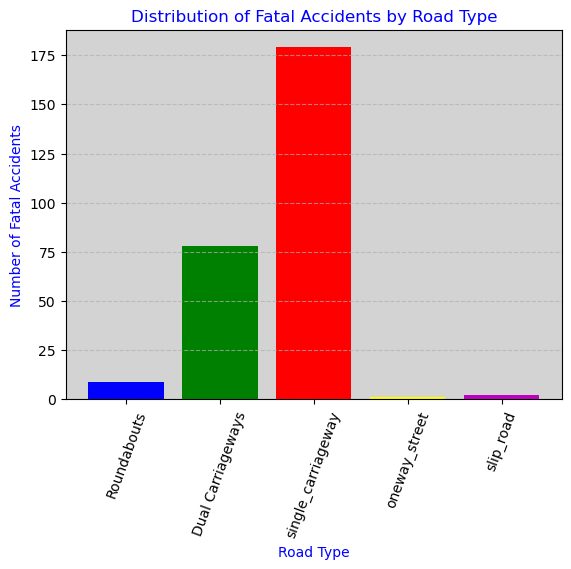

In [49]:
# Define conditions for Road_Types including roundabouts,dual_carriageways,single_carriageway,oneway_street and slip_road
# Fatal accidents distribution on different Road_Types 

condition_roundabout = (superdf['Road_Type'] == 'roundabout') & (superdf['Accident_Severity'] == 'Fatal')
condition_dual_carriageway = (superdf['Road_Type'] == 'dual_carriageway') & (superdf['Accident_Severity'] == 'Fatal')
single_carriageway = (superdf['Road_Type'] == 'single_carriageway') & (superdf['Accident_Severity'] == 'Fatal')
oneway_street = (superdf['Road_Type'] == 'oneway_street') & (superdf['Accident_Severity'] == 'Fatal')
slip_road = (superdf['Road_Type'] == 'slip_road') & (superdf['Accident_Severity'] == 'Fatal')

# Count the number of fatal accidents for each condition

count_roundabout = condition_roundabout.sum()
count_dual_carriageway = condition_dual_carriageway.sum()
count_single_carriageway = single_carriageway.sum()
count_oneway_street = oneway_street.sum()
count_slip_road = slip_road .sum()
# Define labels and counts for the bar chart
x_labels = ['Roundabouts', 'Dual Carriageways','single_carriageway','oneway_street','slip_road']
y_values = [count_roundabout, count_dual_carriageway,count_single_carriageway,count_oneway_street,count_slip_road]

# Create a bar chart
plt.bar(x_labels, y_values, color=['blue', 'green','red','yellow','m'])

# Set labels and title
plt.xlabel('Road Type', color='blue')
plt.ylabel('Number of Fatal Accidents', color='blue')
plt.title('Distribution of Fatal Accidents by Road Type', color='blue')
plt.xticks(rotation=70)
#set grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# Set background color
plt.gca().set_facecolor('lightgrey')
plt.savefig("maliha_image/barchart_fatal.png")
# Show the chart
plt.show()


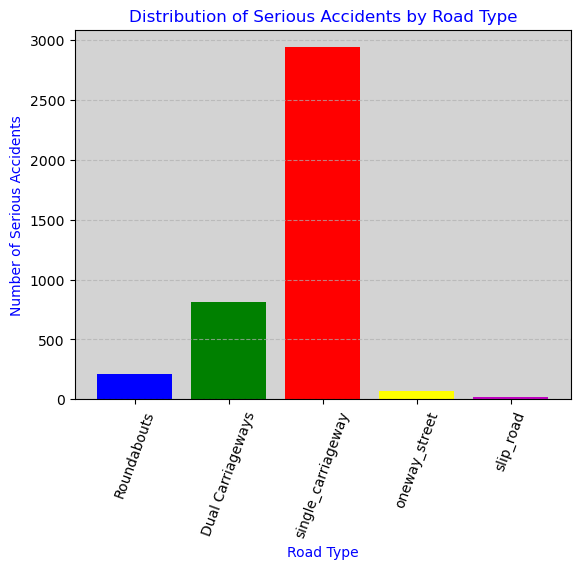

In [50]:
# Define conditions for Road_Types including roundabouts,dual_carriageways,single_carriageway,oneway_street and slip_road
# Serious accidents distribution on different Road_Types 

condition_roundabout1 = (superdf['Road_Type'] == 'roundabout') & (superdf['Accident_Severity'] == 'Serious')
condition_dual_carriageway1 = (superdf['Road_Type'] == 'dual_carriageway') & (superdf['Accident_Severity'] == 'Serious')
single_carriageway1 = (superdf['Road_Type'] == 'single_carriageway') & (superdf['Accident_Severity'] == 'Serious')
oneway_street1 = (superdf['Road_Type'] == 'oneway_street') & (superdf['Accident_Severity'] == 'Serious')
slip_road1 = (superdf['Road_Type'] == 'slip_road') & (superdf['Accident_Severity'] == 'Serious')
# Count the number of accidents for each condition
count_roundabout1 = condition_roundabout1.sum()
count_dual_carriageway1 = condition_dual_carriageway1.sum()
count_single_carriageway1 = single_carriageway1.sum()
count_oneway_street1= oneway_street1.sum()
count_slip_road1 = slip_road1 .sum()
# Define labels and counts for the bar chart
x_labels = ['Roundabouts', 'Dual Carriageways','single_carriageway','oneway_street','slip_road']
y_values = [count_roundabout1, count_dual_carriageway1,count_single_carriageway1,count_oneway_street1,count_slip_road1]

# Create a bar chart
plt.bar(x_labels, y_values, color=['blue', 'green','red','yellow','m'])

# Set labels and title
plt.xlabel('Road Type', color='blue')
plt.ylabel('Number of Serious Accidents', color='blue')
plt.title('Distribution of Serious Accidents by Road Type', color='blue')
plt.xticks(rotation=70)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# Set background color
plt.gca().set_facecolor('lightgrey')
plt.savefig("maliha_image/barchart_Serious.png")
# Show the chart
plt.show()


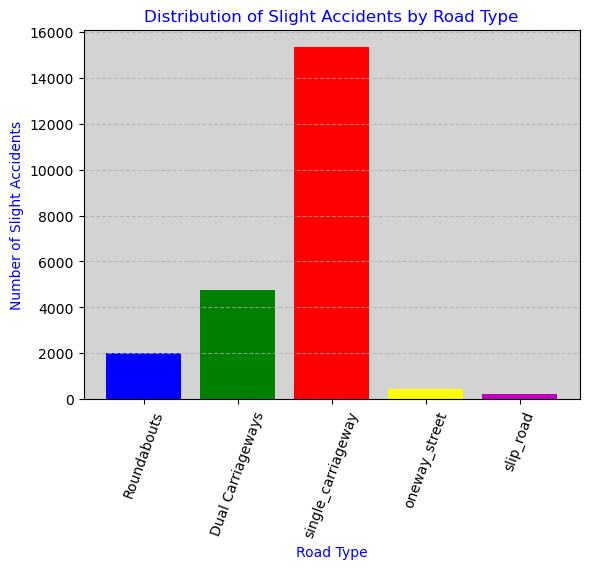

In [51]:
# Define conditions for Road_Types including roundabouts,dual_carriageways,single_carriageway,oneway_street and slip_road
# Slight accidents distribution on different Road_Types 

condition_roundabout2 = (superdf['Road_Type'] == 'roundabout') & (superdf['Accident_Severity'] == 'Slight')
condition_dual_carriageway2 = (superdf['Road_Type'] == 'dual_carriageway') & (superdf['Accident_Severity'] == 'Slight')
single_carriageway2 = (superdf['Road_Type'] == 'single_carriageway') & (superdf['Accident_Severity'] == 'Slight')
oneway_street2 = (superdf['Road_Type'] == 'oneway_street') & (superdf['Accident_Severity'] == 'Slight')
slip_road2 = (superdf['Road_Type'] == 'slip_road') & (superdf['Accident_Severity'] == 'Slight')

# Count the number of accidents for each condition

count_roundabout2 = condition_roundabout2.sum()
count_dual_carriageway2 = condition_dual_carriageway2.sum()
count_single_carriageway2 = single_carriageway2.sum()
count_oneway_street2= oneway_street2.sum()
count_slip_road2 = slip_road2 .sum()

# Define labels and counts for the bar chart

x_labels = ['Roundabouts', 'Dual Carriageways','single_carriageway','oneway_street','slip_road']
y_values = [count_roundabout2, count_dual_carriageway2,count_single_carriageway2,count_oneway_street2,count_slip_road2]

# Create a bar chart
plt.bar(x_labels, y_values, color=['blue', 'green','red','yellow','m'])

# Set labels and title
plt.xlabel('Road Type', color='blue')
plt.ylabel('Number of Slight Accidents', color='blue')
plt.title('Distribution of Slight Accidents by Road Type', color='blue')
plt.xticks(rotation=70)

#Set grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set background color
plt.gca().set_facecolor('lightgrey')
plt.savefig("maliha_image/barchart_Slight.png")

# Show the chart
plt.show()


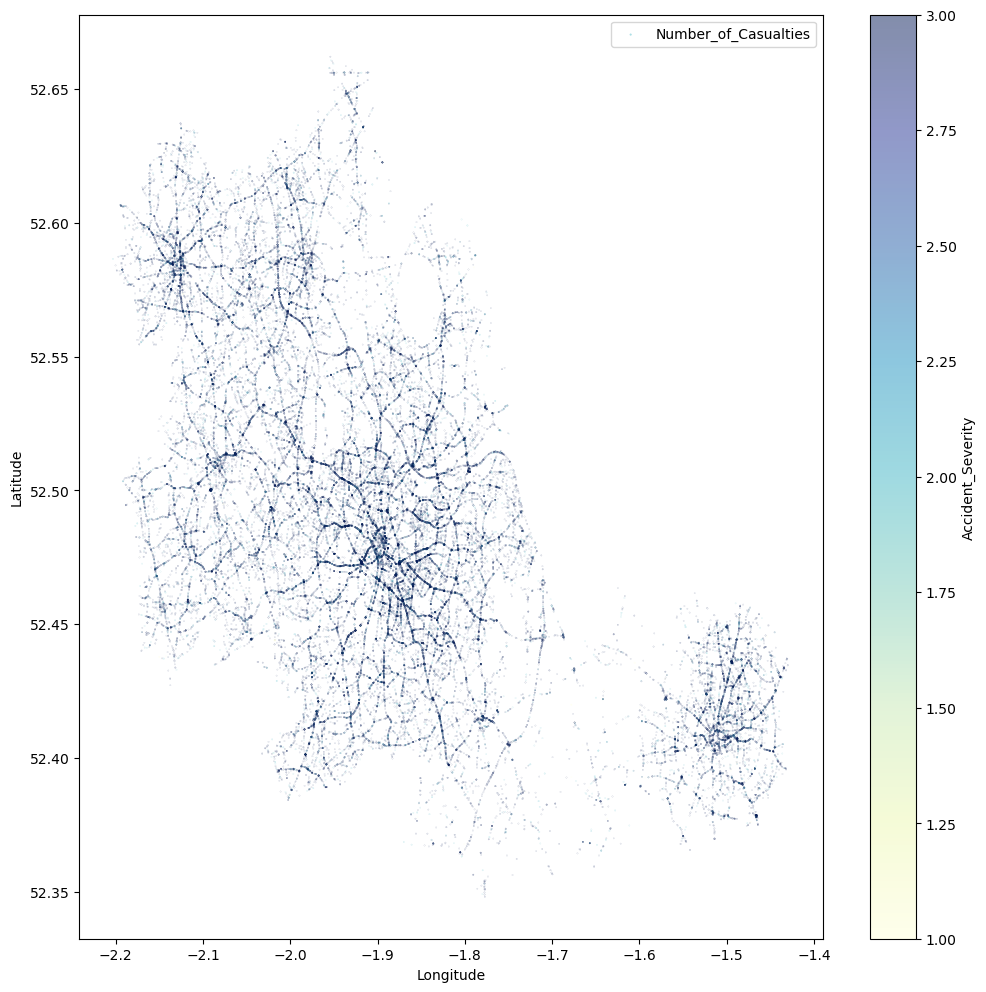

In [53]:
accident_uk_df.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = accident_uk_df["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(12,12),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )
plt.savefig("maliha_image/scatter.png")
plt.legend()